In [2]:
import os, cv2
import itertools
from tqdm import tqdm 
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
img = nib.load("ImageCHD_dataset/train/images/ct_1001_image.nii")
test_image = img.get_fdata()
test_image=scaler.fit_transform(test_image.reshape(-1, test_image.shape[-1])).reshape(test_image.shape)
test_image=test_image.reshape(test_image.shape[0],test_image.shape[1],test_image.shape[2],1)

print(test_image.shape)

(512, 512, 221, 1)


In [5]:
img = nib.load("ImageCHD_dataset/train/labels/ct_1002_label.nii")
test_mask = img.get_fdata()
test_mask=scaler.fit_transform(test_mask.reshape(-1, test_mask.shape[-1])).reshape(test_mask.shape)
test_mask = test_mask.reshape(test_mask.shape[0],test_mask.shape[1],test_mask.shape[2],1)

print(test_mask.shape)
print(np.unique(test_mask))

(512, 512, 137, 1)
[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.66666667
 0.71428571 0.85714286 1.        ]


133


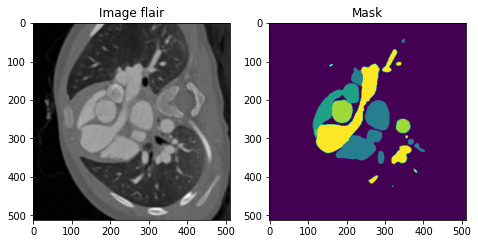

In [4]:
import random

n_slice=random.randint(0, test_mask.shape[0])
print(n_slice)
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
val, counts = np.unique(test_mask, return_counts=True)
print(val, counts)

In [ ]:
from tensorflow.keras.utils import to_categorical

test_mask= to_categorical(test_mask, num_classes=13)
print(test_mask.shape)

In [ ]:
def resize_data(data):
    initial_size_x = data.shape[0]
    initial_size_y = data.shape[1]
    initial_size_z = data.shape[2]

    new_size_x = 512
    new_size_y = 512
    new_size_z = 132

    delta_x = initial_size_x / new_size_x
    delta_y = initial_size_y / new_size_y
    delta_z = initial_size_z / new_size_z

    new_data = np.zeros((new_size_x, new_size_y, new_size_z))

    for x, y, z in itertools.product(range(new_size_x),
                                     range(new_size_y),
                                     range(new_size_z)):
        new_data[x][y][z] = data[int(x * delta_x)][int(y * delta_y)][int(z * delta_z)]

    return new_data

In [ ]:
img = nib.load("ImageCHD_dataset/train/labels/ct_1001_label.nii")
test_mask = img.get_fdata()
test_mask = resize_data(test_mask)
test_mask=scaler.fit_transform(test_mask.reshape(-1, test_mask.shape[-1])).reshape(test_mask.shape)
print(test_mask.shape)
print(np.unique(test_mask))

In [ ]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()